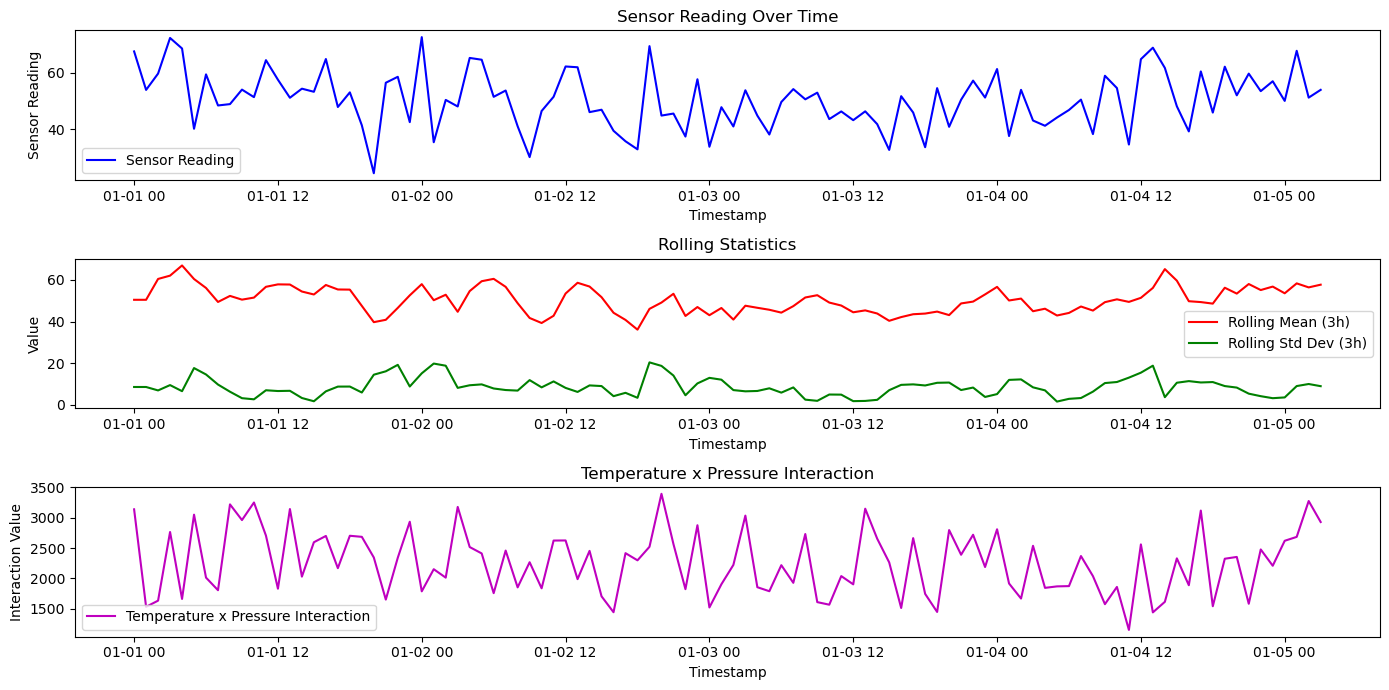

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Please create a synthetic dataset
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='H')
sensor_readings = np.random.randn(100) * 10 + 50
temperature = np.random.randn(100) * 5 + 22
pressure = np.random.randn(100) * 3 + 101

data = pd.DataFrame({
    'timestamp': dates,
    'sensor_reading': sensor_readings,
    'temperature': temperature,
    'pressure': pressure
})

# It will be better to convert the timestamp column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# In this step, we should extract time-based features
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Please create rolling statistics for sensor_reading
data['rolling_mean_3h'] = data['sensor_reading'].rolling(window=3).mean()
data['rolling_std_3h'] = data['sensor_reading'].rolling(window=3).std()
data['rolling_sum_3h'] = data['sensor_reading'].rolling(window=3).sum()

# rightnow try to create lag features
data['lag_1h'] = data['sensor_reading'].shift(1)
data['lag_2h'] = data['sensor_reading'].shift(2)

# please create interaction features
data['temp_pressure_interaction'] = data['temperature'] * data['pressure']

# Handle missing values (for demonstration, fill with mean)
data.fillna(data.mean(), inplace=True)

# Plot the time series of sensor readings
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(data['timestamp'], data['sensor_reading'], label='Sensor Reading', color='b')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.title('Sensor Reading Over Time')
plt.legend()

# Plot rolling statistics
plt.subplot(3, 1, 2)
plt.plot(data['timestamp'], data['rolling_mean_3h'], label='Rolling Mean (3h)', color='r')
plt.plot(data['timestamp'], data['rolling_std_3h'], label='Rolling Std Dev (3h)', color='g')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Rolling Statistics')
plt.legend()

# Plot interaction feature
plt.subplot(3, 1, 3)
plt.plot(data['timestamp'], data['temp_pressure_interaction'], label='Temperature x Pressure Interaction', color='m')
plt.xlabel('Timestamp')
plt.ylabel('Interaction Value')
plt.title('Temperature x Pressure Interaction')
plt.legend()

plt.tight_layout()
plt.show()
